In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [45]:
# 1. Préparer les générateurs de données
train_dir = r'C:\Users\oumar\Downloads\archive (1)\dogs_vs_cats\train'
test_dir = r'C:\Users\oumar\Downloads\archive (1)\dogs_vs_cats\test'

In [47]:
# Générateur de données avec augmentation pour l'entraînement
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Réserver 20% des données pour validation
)

# Générateur pour l'entraînement
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),  # Taille d'entrée compatible avec VGG16
    batch_size=64,
    class_mode='binary',
    subset='training'
)

# Générateur pour la validation
val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=64,
    class_mode='binary',
    subset='validation'
)

# Générateur pour les données de test
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(100, 100),
    batch_size=64,
    class_mode='binary',
    shuffle=False
)


Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Initialisation du modèle
model = Sequential()

# Bloc 1 : Convolution + MaxPooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Bloc 2 : Convolution + MaxPooling
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Bloc 3 : Convolution + MaxPooling
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Bloc 4 : Convolution + MaxPooling (ajout pour plus de profondeur)
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Aplatissement
model.add(Flatten())

# Couches denses entièrement connectées
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Dropout plus élevé pour réduire le surapprentissage
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Couche de sortie
model.add(Dense(1, activation='sigmoid'))  # Sigmoid pour classification binaire

# Compilation du modèle
model.compile(
    optimizer=Adam(learning_rate=0.0001),  # Adam avec un learning rate réduit pour une convergence stable
    loss='binary_crossentropy',           # Fonction de perte pour classification binaire
    metrics=['accuracy']                  # Suivi de la précision
)

# Résumé de l'architecture
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 98, 98, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 96, 96, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 96, 96, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 46, 46, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 46, 46, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 44, 44, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 44, 44, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 20, 20, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 20, 20, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 18, 18, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 18, 18, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,208,097 (4.61 MB)

 Trainable params: 1,206,689 (4.60 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [67]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Early stopping pour éviter le surapprentissage
early_stopping = EarlyStopping(
    monitor='val_loss',      # Surveille la perte de validation
    patience=5,              # Arrête l'entraînement après 5 époques sans amélioration
    restore_best_weights=True
)

# Sauvegarde du meilleur modèle
checkpoint = ModelCheckpoint(
    'best_model.keras',         # Nom du fichier pour sauvegarder le modèle
    monitor='val_loss',      # Sauvegarde basée sur la perte de validation
    save_best_only=True
)

# Entraînement
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,                  # Jusqu'à 50 époques (EarlyStopping peut arrêter avant)
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator),
    callbacks=[early_stopping, checkpoint]  # Inclure les callbacks
)


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 423s 2s/step - accuracy: 0.5132 - loss: 1.1993 - val_accuracy: 0.5000 - val_loss: 1.0621
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 405s 2s/step - accuracy: 0.5407 - loss: 0.7443 - val_accuracy: 0.5008 - val_loss: 1.6319
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 658s 3s/step - accuracy: 0.5543 - loss: 0.7007 - val_accuracy: 0.5190 - val_loss: 1.2447
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 407s 2s/step - accuracy: 0.5704 - loss: 0.6779 - val_accuracy: 0.5240 - val_loss: 1.3362
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 405s 2s/step - accuracy: 0.5794 - loss: 0.6745 - val_accuracy: 0.5192 - val_loss: 1.3700
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 405s 2s/step - accuracy: 0.5988 - loss: 0.6633 - val_accuracy: 0.5332 - val_loss: 1.3131


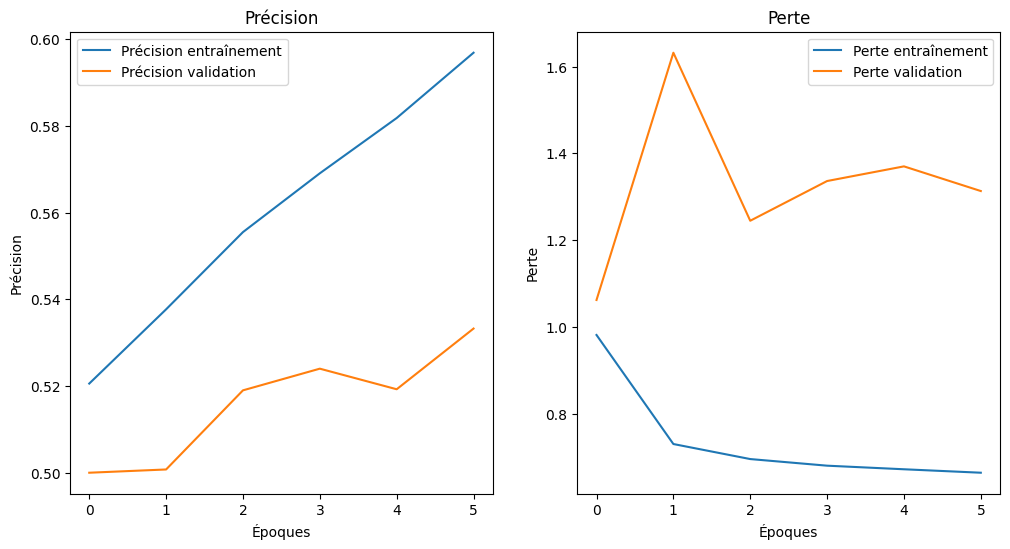

In [69]:
import matplotlib.pyplot as plt

# Courbes d'entraînement et de validation
plt.figure(figsize=(12, 6))

# Précision
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Précision entraînement')
plt.plot(history.history['val_accuracy'], label='Précision validation')
plt.title('Précision')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()

# Perte
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perte entraînement')
plt.plot(history.history['val_loss'], label='Perte validation')
plt.title('Perte')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()

plt.show()


In [75]:
# Charger le meilleur modèle sauvegardé
from tensorflow.keras.models import load_model

best_model = load_model('best_model.keras')

# Évaluation sur les données de test
test_loss, test_accuracy = best_model.evaluate(test_generator)
print(f"Précision sur l'ensemble de test : {test_accuracy:.2f}")


79/79 ━━━━━━━━━━━━━━━━━━━━ 30s 362ms/step - accuracy: 0.8353 - loss: 0.4524
Précision sur l'ensemble de test : 0.50
